In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [2]:
flight = 650

In [3]:
basedir = 'data/P3_2017/LGS'
infile = 'line_' + str(flight) + 'b.csv'
# infile = 'OIB_P3_F2001_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2004_exportfromGeosoft.csv'
df = pd.read_csv(os.path.join(basedir, infile))
df.head()

,Line,AccBiasZ,AccBiasZ_neg,CROSS_DIFF_FA_100,DgS_filter_Corrected_Free_Air,dgs_imar_2,dgs_imar_3,dgs_imar_diff,dgs_imar_linear,dgs_imar_res,...,imar_shift,LATITUDE,Lon,LONG_comp,LONGITUDE,temp,temp_neg,unixtime,X,Y
0,L650,0.002190,-0.002190,NaN,-27.069690,202.108575,205.592594,191.944457,206.496575,-13.648137,...,-27.014147,-79.913642,NaN,173.893016,173.893016,26.450040,-26.450040,1.479860e+09,116881.995451,-1.092432e+06
1,L650,0.002190,-0.002190,NaN,-27.098409,202.100744,205.577940,191.920372,206.484448,-13.657568,...,-27.018781,-79.913734,NaN,173.897723,173.897723,26.453072,-26.453072,1.479860e+09,116791.163593,-1.092432e+06
2,L650,0.002190,-0.002190,NaN,-27.126511,202.092913,205.563290,191.904819,206.472321,-13.658471,...,-27.031330,-79.913826,NaN,173.902430,173.902430,26.455118,-26.455118,1.479860e+09,116700.349788,-1.092431e+06
3,L650,0.002191,-0.002191,NaN,-27.155135,202.085079,205.548645,191.898291,206.460193,-13.650353,...,-27.053426,-79.913918,NaN,173.907136,173.907136,26.457163,-26.457163,1.479860e+09,116609.550865,-1.092431e+06
4,L650,0.002191,-0.002191,NaN,-27.182982,202.077245,205.534003,191.901713,206.448066,-13.632290,...,-27.084695,-79.914010,NaN,173.911842,173.911842,26.459313,-26.459313,1.479860e+09,116518.759404,-1.092430e+06


In [4]:
df.keys()

Index(['Line', 'AccBiasZ', 'AccBiasZ_neg', 'CROSS_DIFF_FA_100',
       'DgS_filter_Corrected_Free_Air', 'dgs_imar_2', 'dgs_imar_3',
       'dgs_imar_diff', 'dgs_imar_linear', 'dgs_imar_res', 'diff', 'diff_100',
       'diff_zls', 'Dist', 'FA_100', 'FA_100_level', 'FA_def_edit', 'FA_RAW',
       'FA_RAW_edit', 'FA_SP', 'fag_oib', 'Height', 'Height1', 'Height_100',
       'imar_detrend1', 'imar_detrend2', 'imar_detrend2_100', 'imar_detrend3',
       'imar_mgal', 'imar_mgal_neg', 'imar_shift', 'LATITUDE', 'Lon',
       'LONG_comp', 'LONGITUDE', 'temp', 'temp_neg', 'unixtime', 'X', 'Y'],
      dtype='object')

In [5]:
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))

In [6]:
    from my_OIB_functions import haversine
    
    # Compute distance along transect
    distance = np.zeros((np.size(df['LONGITUDE'])))
    for i in range(2, np.size(df['LONGITUDE'])):
        distance[i] = distance[i - 1] + haversine([df['LATITUDE'].values[i - 1], df['LONGITUDE'].values[i - 1]],
                                                  [df['LATITUDE'].values[i], df['LONGITUDE'].values[i]])
    df['DIST'] = distance

Text(0.5, 0.98, 'line_650b_FullFlight')

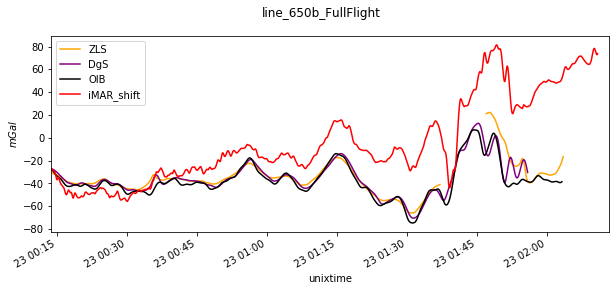

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
ln1 = df['FA_def_edit'].plot(label='ZLS', color='orange')
ln2 = df['DgS_filter_Corrected_Free_Air'].plot(label='DgS', color='purple')
ln3 = df['fag_oib'].plot(label='OIB', color='black')
ln4 = df['imar_shift'].plot(label='iMAR_shift', color='red')
# ln5 = df['imar_mgal_neg'].plot(label='iMAR')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:9] + '_FullFlight')
# plt.savefig('figs/' + infile[:9] + '_Grav_AllComp_FullFlight.pdf')

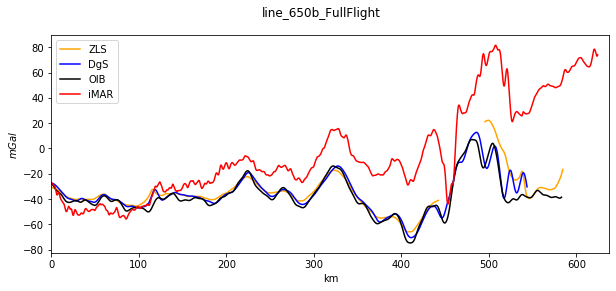

In [8]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['FA_def_edit'], label='ZLS', color='orange')
ln1 = plt.plot(df['Dist'], df['DgS_filter_Corrected_Free_Air'], label='DgS', color='blue')
ln1 = plt.plot(df['Dist'], df['fag_oib'], label='OIB', color='black')
ln1 = plt.plot(df['Dist'], df['imar_shift'], label='iMAR', color='red')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle(infile[:9] + '_FullFlight')
plt.savefig('figs/' + infile[:9] + '_Grav_AllComp_FullFlight.pdf')

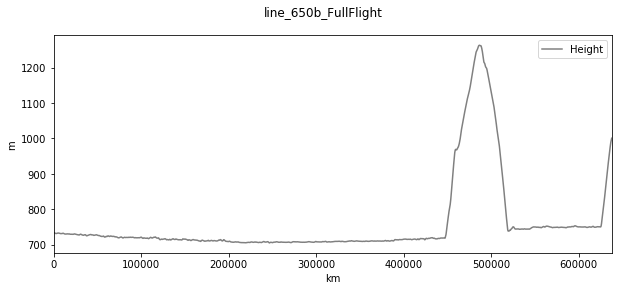

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['Height'], label='Height', c='grey')
# ln1 = plt.plot(df['Dist']/1000, df['Height_100'], label='Height_100')
# ln1 = plt.plot(df['Dist']/1000, df['Height1'], label='Height_1')
plt.xlim(min(df['Dist']), max(df['Dist']))
ax.set_xlabel('km')
ax.set_ylabel('m')
plt.legend()
plt.suptitle(infile[:9] + '_FullFlight')
plt.savefig('figs/' + infile[:9] + '_PNT_AllComp_FullFlight.pdf')

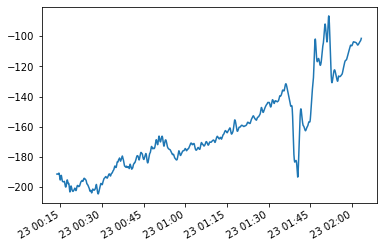

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df['imar_mgal_neg'] - df['fag_oib'])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()

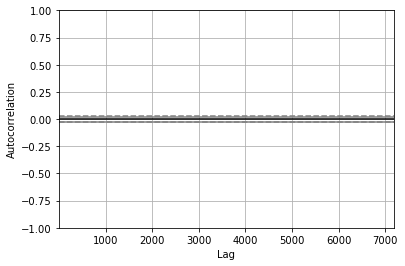

In [11]:
from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(df['imar_mgal'])
# autocorrelation_plot(df['DgS_filter_Corrected_Free_Air'])
autocorrelation_plot(df['fag_oib'])
# plt.legend()
plt.show()

Text(0, 0.5, '$^{\\circ}C$')

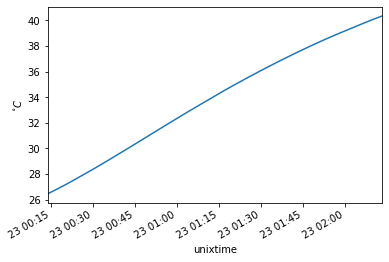

In [12]:
fig, ax = plt.subplots()
df['temp'].plot()
# df['temp_neg'].plot()
ax.set_ylabel('$^{\circ}C$')

In [13]:
# F001
begin_line = df.index[0]
end_line = df.index[-1]


In [14]:
# fig, ax = plt.subplots()
# # gravity = gravity[(begin_line <= gravity.index) & (gravity.index <= end_line)]
# df[['grav_4_70_corr', 'oib_10_11_12']].loc[begin_line: end_line].plot(ax=ax)
# ax.set_ylabel('$mGal$')
# plt.suptitle(infile[:12] + '_LineSegment')
# plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB_LineSegment.png')

In [15]:
df['imar_bias'] = df['imar_shift'] - df['fag_oib']

Text(0, 0.5, '$mGal$')

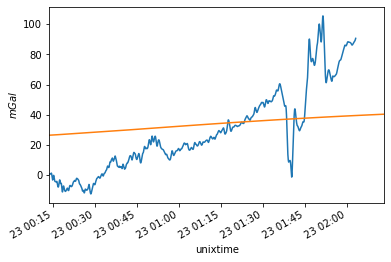

In [16]:
fig, ax = plt.subplots()
# df['imar_bias'].loc[begin_line: end_line].plot()
df['imar_bias'].plot()
df['temp'].plot()
ax.set_ylabel('$mGal$')



# COMPARE ALL 650b
## AGU 2019 poster

In [237]:
basedir = '/Volumes/C/Users/Caitlin/Documents/ROSETTA/ROSETTA_Grid/'
infile = 'L' + str(flight) + '_intercompare_ALL.csv'
# infile = 'OIB_P3_F2001_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2004_exportfromGeosoft.csv'
df = pd.read_csv(os.path.join(basedir, infile))

df = df.apply(pd.to_numeric, errors='ignore')

df.head()

,iMAR_AN04_TerraPOS_10mgal,turbulence,DgS_AN02,DgS_AN03,DgS_AN04,H_Ell,iMAR_AN02,iMAR_AN03,sgl_all,iMAR_AN04_TC_ed,...,UTCDate,x,y,ZLS_AN02,ZLS_AN03,ZLS_AN04,iMAR_AN04_TerraPOS_60mgal_detrend_shift,FA_RAW,Free_Air_dgs,VaccCor
0,NaN,NaN,NaN,NaN,NaN,833.925,NaN,NaN,NaN,NaN,...,2015/11/11,384754.146498,-1.089357e+06,NaN,NaN,NaN,NaN,NaN,-3146.574,NaN
1,NaN,6505.382388,NaN,NaN,NaN,833.909,NaN,NaN,NaN,NaN,...,2015/11/11,384663.812306,-1.089325e+06,NaN,NaN,NaN,NaN,NaN,-694.740,-49500.000001
2,NaN,28965.841952,NaN,NaN,NaN,833.398,NaN,NaN,NaN,NaN,...,2015/11/11,384572.253230,-1.089296e+06,NaN,NaN,NaN,NaN,NaN,-31.660,-40300.000000
3,NaN,29403.718586,NaN,NaN,NaN,832.484,NaN,NaN,NaN,NaN,...,2015/11/11,384479.519768,-1.089271e+06,NaN,NaN,NaN,NaN,NaN,2291.480,2000.000000
4,NaN,37293.237131,NaN,NaN,NaN,831.590,NaN,NaN,NaN,NaN,...,2015/11/11,384385.815396,-1.089250e+06,NaN,NaN,NaN,NaN,NaN,1761.465,7400.000000


In [238]:
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))

In [239]:
    from my_OIB_functions import haversine
    
    # Compute distance along transect
    distance = np.zeros((np.size(df['Longitude'])))
    for i in range(2, np.size(df['Longitude'])):
        distance[i] = distance[i - 1] + haversine([df['Latitude'].values[i - 1], df['Longitude'].values[i - 1]],
                                                  [df['Latitude'].values[i], df['Longitude'].values[i]])
    df['Dist'] = distance

In [240]:
df.describe()

,iMAR_AN04_TerraPOS_10mgal,turbulence,DgS_AN02,DgS_AN03,DgS_AN04,H_Ell,iMAR_AN02,iMAR_AN03,sgl_all,iMAR_AN04_TC_ed,...,x,y,ZLS_AN02,ZLS_AN03,ZLS_AN04,iMAR_AN04_TerraPOS_60mgal_detrend_shift,FA_RAW,Free_Air_dgs,VaccCor,Dist
count,7482.000000,9969.000000,7838.000000,9122.000000,6848.000000,9971.000000,0.0,9346.000000,8126.000000,7264.000000,...,9971.000000,9.971000e+03,7535.000000,8917.000000,6582.000000,7519.000000,9708.000000,9971.000000,9969.000000,9971.000000
mean,4.553729,5432.074837,-33.868611,-34.194653,-33.638279,801.023467,NaN,-33.921984,-35.579097,-33.811553,...,-65152.186070,-1.091177e+06,-34.418080,-32.787492,-32.917415,-38.700000,-33.822816,-36.006830,15.237235,456.809857
std,6.060502,3110.145482,15.210415,15.107583,9.305033,92.073026,NaN,13.867527,14.191040,10.797797,...,263780.694717,1.443974e+03,12.000074,18.668760,11.189319,10.818355,1520.155389,2752.301937,5864.285040,267.815575
min,-9.217405,141.421356,-71.359686,-75.160803,-57.493035,739.765000,NaN,-72.742075,-74.330436,-64.494103,...,-531169.929179,-1.093195e+06,-71.168379,-72.769931,-57.829383,-85.852492,-23313.497900,-24163.353000,-63500.000000,0.000000
25%,0.425138,3782.710755,-43.046085,-42.093887,-40.617598,750.125000,NaN,-42.783163,-43.374107,-39.998693,...,-293658.054172,-1.092606e+06,-41.467960,-42.253203,-40.579429,-43.309431,-571.104443,-1160.506000,-2500.000000,224.087311
50%,6.301062,4750.715042,-34.637833,-36.126552,-34.567882,763.101000,NaN,-35.785238,-37.372940,-34.405875,...,-58288.634922,-1.091140e+06,-34.183653,-36.040125,-33.935295,-38.948502,-36.766918,-34.208000,0.000000,449.873297
75%,9.466673,6532.489324,-25.589031,-26.801690,-25.718322,821.668500,NaN,-25.612380,-27.639660,-25.652563,...,164050.639690,-1.090141e+06,-26.542041,-26.789568,-24.399666,-30.651860,512.423947,1060.182000,2600.000000,688.841062
max,13.510435,40029.101914,20.138280,27.206091,-15.852555,1251.847000,NaN,8.766644,7.094493,-11.999428,...,384754.146498,-1.088184e+06,5.747708,53.231082,-4.520153,-17.196600,27038.577900,26368.483000,69300.000001,929.841299


## Time series

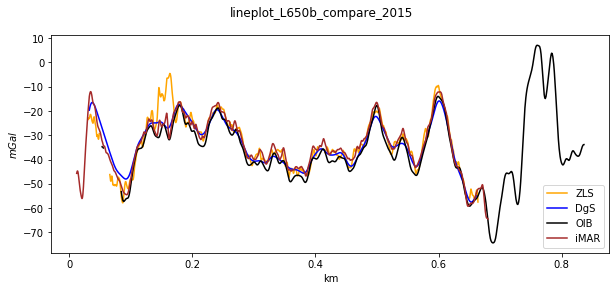

In [538]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['ZLS_AN04'], label='ZLS', color='orange')
ln1 = plt.plot(df['Dist'], df['DgS_AN04'], label='DgS', color='blue')
ln1 = plt.plot(df['Dist'], df['sgl_all'], label='OIB', color='black')
ln1 = plt.plot(df['Dist'], df['iMAR_AN04_TC_ed'], label='iMAR', color='brown')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
# plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle('lineplot_L650b_compare_2015')
plt.savefig('figs/lineplot_L650b_compare_AN04.pdf')

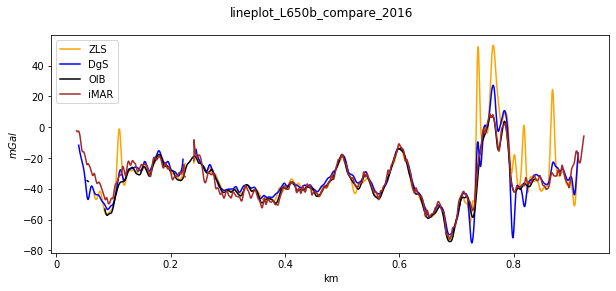

In [537]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['ZLS_AN03'], label='ZLS', color='orange')
ln1 = plt.plot(df['Dist'], df['DgS_AN03'], label='DgS', color='blue')
ln1 = plt.plot(df['Dist'], df['sgl_all'], label='OIB', color='black')
ln1 = plt.plot(df['Dist'], df['iMAR_AN03'], label='iMAR', color='brown')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
# plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle('lineplot_L650b_compare_2016')
plt.savefig('figs/lineplot_L650b_compare_AN03.pdf')


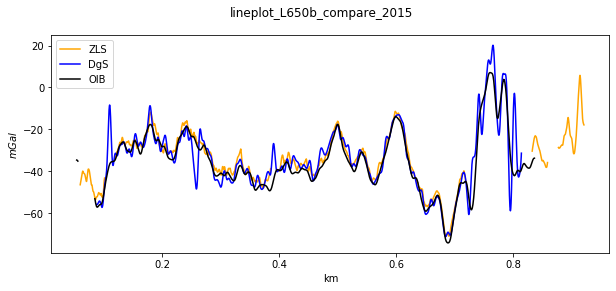

In [539]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['ZLS_AN02'], label='ZLS', color='orange')
ln1 = plt.plot(df['Dist'], df['DgS_AN02'], label='DgS', color='blue')
ln1 = plt.plot(df['Dist'], df['sgl_all'], label='OIB', color='black')
# ln1 = plt.plot(df['Dist'], df['iMAR_AN04_TC_ed'], label='iMAR', color='brown')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
# plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle('lineplot_L650b_compare_2015')
plt.savefig('figs/lineplot_L650b_compare_AN02.pdf')

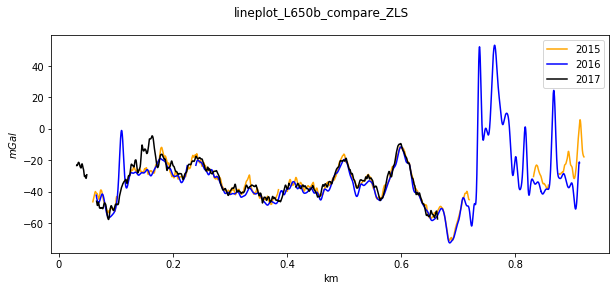

In [535]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['ZLS_AN02'], label='2015', color='orange')
ln1 = plt.plot(df['Dist'], df['ZLS_AN03'], label='2016', color='blue')
ln1 = plt.plot(df['Dist'], df['ZLS_AN04'], label='2017', color='black')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
# plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle('lineplot_L650b_compare_ZLS')
plt.savefig('figs/lineplot_L650b_compare_ZLS.pdf')

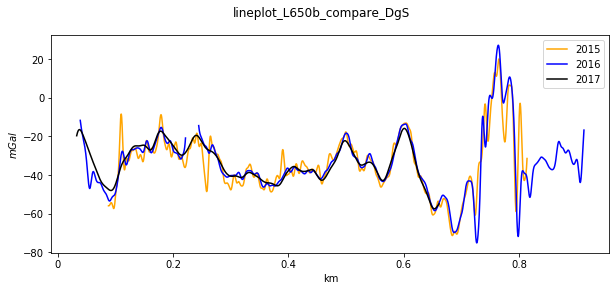

In [536]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['DgS_AN02'], label='2015', color='orange')
ln1 = plt.plot(df['Dist'], df['DgS_AN03'], label='2016', color='blue')
ln1 = plt.plot(df['Dist'], df['DgS_AN04'], label='2017', color='black')
# ln1 = plt.plot(df['Dist'], df['iMAR_AN04_TC_ed'], label='iMAR', color='brown')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
# plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle('lineplot_L650b_compare_DgS')
plt.savefig('figs/lineplot_L650b_compare_DgS.pdf')

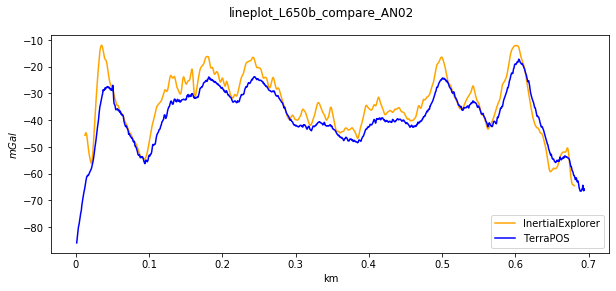

In [532]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 4))
ln1 = plt.plot(df['Dist'], df['iMAR_AN04_TC_ed'], label='InertialExplorer', color='orange')
ln1 = plt.plot(df['Dist'], df['iMAR_AN04_TerraPOS_60mgal_detrend_shift'], label='TerraPOS', color='blue')
# ln1 = plt.plot(df['Dist'], df['DgS_AN04'], label='3', color='black')
# ln1 = plt.plot(df['Dist'], df['iMAR_AN04_TC_ed'], label='iMAR', color='brown')
ax.set_xlabel('km')
ax.set_ylabel('$mGal$')
# plt.xlim(min(df['Dist']), max(df['Dist']))
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1e3))
ax.xaxis.set_major_formatter(ticks_x)
plt.legend()
plt.suptitle('lineplot_L650b_compare_AN02')
plt.savefig('figs/lineplot_L650b_compare_iMAR.pdf')

## PDF

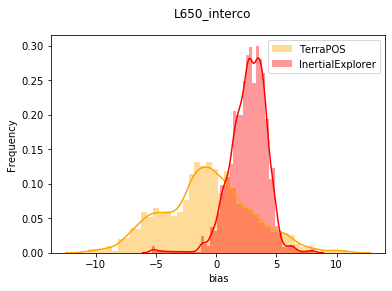

In [540]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
df['bias'] = df['iMAR_AN04_TerraPOS_60mgal_detrend_shift'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='TerraPOS')
#
df['bias'] = df['iMAR_AN04_TC_ed'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='InertialExplorer')

# ax.set_xlim([-100, 100])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/PFD_compare_iMAR_biases.pdf')

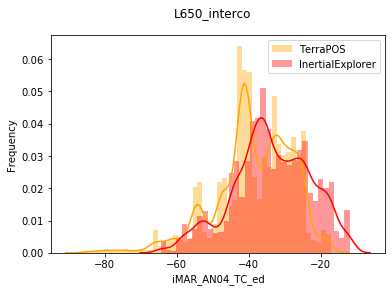

In [524]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
var = 'iMAR_AN04_TerraPOS_60mgal_detrend_shift'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='TerraPOS')
#
var = 'iMAR_AN04_TC_ed'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='InertialExplorer')

# ax.set_xlim([-100, 100])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/PFD_compare_iMAR.pdf')

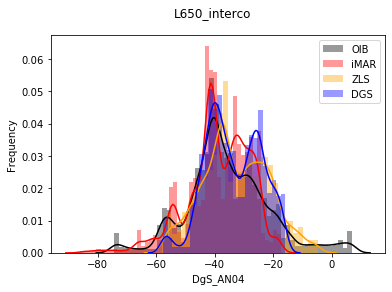

In [520]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
var = 'sgl_all'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='black', label='OIB')
#
var = 'iMAR_AN04_TerraPOS_60mgal_detrend_shift'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='iMAR')
#
var = 'ZLS_AN04'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='ZLS')
#
var = 'DgS_AN04'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='blue', label='DGS')

# ax.set_xlim([-100, 100])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/PFD_compare_ALL_AN04.pdf')

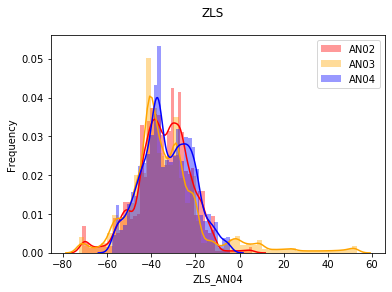

In [519]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
var = 'ZLS_AN02'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='AN02')
#
var = 'ZLS_AN03'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='AN03')
#
var = 'ZLS_AN04'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='blue', label='AN04')

# ax.set_xlim([-100, 100])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle('ZLS')
plt.savefig('figs/PFD_compare_ZLS.pdf')

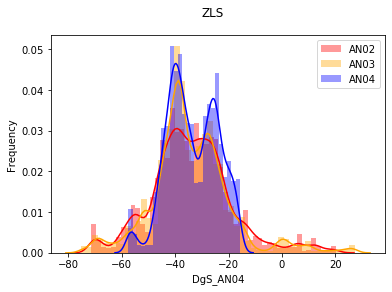

In [521]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
var = 'DgS_AN02'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='AN02')
#
var = 'DgS_AN03'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='AN03')
#
var = 'DgS_AN04'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='blue', label='AN04')

# ax.set_xlim([-100, 100])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle('ZLS')
plt.savefig('figs/PFD_compare_DgS.pdf')

## PDF - Biases

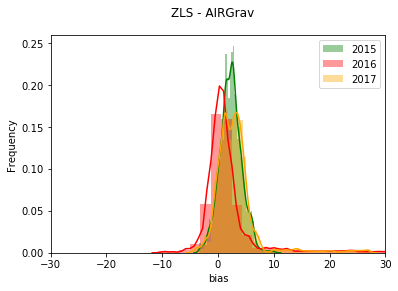

In [551]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
df['bias'] = df['ZLS_AN02'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='green', label='2015')
#
df['bias'] = df['ZLS_AN03'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='2016')
#
df['bias'] = df['ZLS_AN04'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='2017')
#
ax.set_xlim([-30, 30])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle('ZLS - AIRGrav')
plt.savefig('figs/PFD_compare_ZLS_biases.pdf')

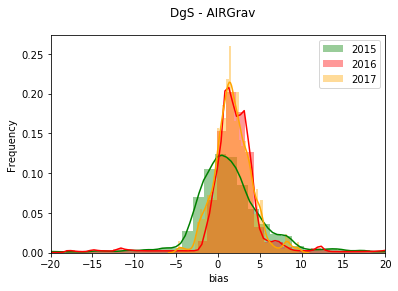

In [552]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
df['bias'] = df['DgS_AN02'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='green', label='2015')
#
df['bias'] = df['DgS_AN03'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='2016')
#
df['bias'] = df['DgS_AN04'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='2017')
#
ax.set_xlim([-20, 20])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle('DgS - AIRGrav')
plt.savefig('figs/PFD_compare_DgS_biases.pdf')

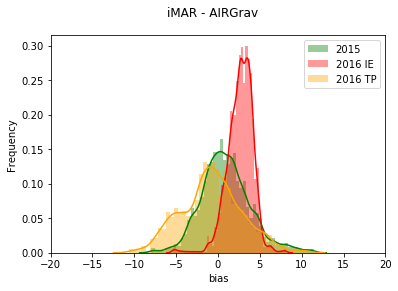

In [550]:
fig, ax = plt.subplots(facecolor='white')
# ax = sns.distplot(df['imar_bias_new'], rug=True, hist=False)
# ax = sns.distplot(df['imar_bias_new_ALL'], kde=True, color='red', label='P3_ALL')
# ax = sns.distplot(df['imar_bias_new_F2004'], kde=True, color='blue', label='P3_F2004')
# ax = sns.distplot(df['imar_bias_new_auto'], kde=True, color='green', label='P3_auto')
# ax = sns.distplot(df['iMAR_AN04_TC_ed'], kde=True, color='red', label='Adjusted')
#
df['bias'] = df['iMAR_AN03'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='green', label='2015')
#
df['bias'] = df['iMAR_AN04_TC_ed'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='red', label='2016 IE')
#
df['bias'] = df['iMAR_AN04_TerraPOS_60mgal_detrend_shift'] - df['sgl_all']
var = 'bias'
x = df[var][~np.isnan(df[var])]
ax = sns.distplot(x, kde=True, color='orange', label='2016 TP')
#
ax.set_xlim([-20, 20])
ax.set_ylabel('Frequency')
plt.legend()
plt.suptitle('iMAR - AIRGrav')
plt.savefig('figs/PFD_compare_iMAR_biases.pdf')

## Cross Correlations

In [254]:
from scipy import signal

corr = signal.correlate(df['iMAR_AN03'], df['iMAR_AN04_TC_ed'], mode='full')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9971 entries, 2015-11-11 22:11:23 to 2015-11-12 00:57:33
Data columns (total 25 columns):
iMAR_AN04_TerraPOS_10mgal                  7482 non-null float64
turbulence                                 9969 non-null float64
DgS_AN02                                   7838 non-null float64
DgS_AN03                                   9122 non-null float64
DgS_AN04                                   6848 non-null float64
H_Ell                                      9971 non-null float64
iMAR_AN02                                  0 non-null float64
iMAR_AN03                                  9346 non-null float64
sgl_all                                    8126 non-null float64
iMAR_AN04_TC_ed                            7264 non-null float64
Latitude                                   9971 non-null float64
Longitude                                  9971 non-null float64
unixtime                                   9971 non-null int64
UTCDate          

In [390]:
corr = df[['DgS_AN02', 'DgS_AN03','DgS_AN04', 
    'iMAR_AN03', 'iMAR_AN04_TC_ed', 'iMAR_AN04_TerraPOS_60mgal_detrend_shift',
   'sgl_all', 
   'ZLS_AN02', 'ZLS_AN03', 'ZLS_AN04']].corr()

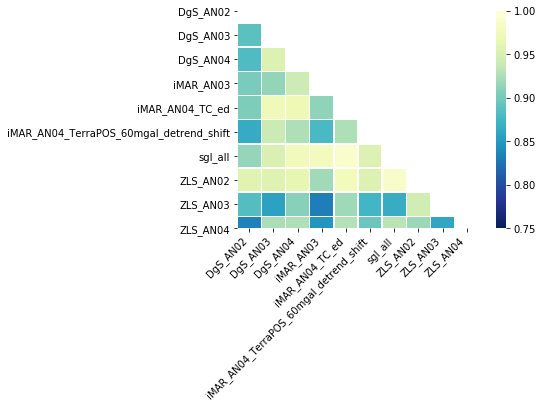

In [408]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
    corr, 
    vmin=0.75, vmax=1,
    cmap="YlGnBu_r",    #     cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    mask=mask, linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('heatmap_L650_ALL.pdf')

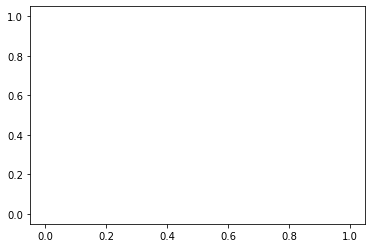

In [256]:
df.corr()

,iMAR_AN04_TerraPOS_10mgal,turbulence,DgS_AN02,DgS_AN03,DgS_AN04,H_Ell,iMAR_AN02,iMAR_AN03,sgl_all,iMAR_AN04_TC_ed,...,x,y,ZLS_AN02,ZLS_AN03,ZLS_AN04,iMAR_AN04_TerraPOS_60mgal_detrend_shift,FA_RAW,Free_Air_dgs,VaccCor,Dist
iMAR_AN04_TerraPOS_10mgal,1.000000,-0.740559,-0.195380,-0.099614,-0.199129,-0.932517,NaN,-0.320675,-0.146637,-0.052364,...,-0.943665,0.283502,-0.079112,-0.145277,-0.073710,2.169456e-01,0.002837,-0.003361,-0.003120,0.943657
turbulence,-0.740559,1.000000,0.349903,0.215789,0.505843,0.152234,NaN,0.335163,0.402957,0.192846,...,0.645900,-0.078099,0.164921,0.185413,0.350103,-2.389801e-01,-0.003983,0.007851,0.009392,-0.645929
DgS_AN02,-0.195380,0.349903,1.000000,0.888872,0.882338,0.610362,NaN,0.903845,0.915928,0.905534,...,-0.009428,0.043790,0.958233,0.883930,0.834390,8.661607e-01,0.013042,0.005980,-0.016983,0.009403
DgS_AN03,-0.099614,0.215789,0.888872,1.000000,0.955657,0.662175,NaN,0.914892,0.952725,0.972944,...,-0.029728,0.015846,0.956733,0.856713,0.925601,9.413783e-01,0.008982,0.000868,-0.038034,0.029712
DgS_AN04,-0.199129,0.505843,0.882338,0.955657,1.000000,0.323726,NaN,0.941737,0.976291,0.970997,...,0.288794,-0.172330,0.963747,0.909632,0.926632,9.267365e-01,0.007181,0.004565,-0.000175,-0.288787
H_Ell,-0.932517,0.152234,0.610362,0.662175,0.323726,1.000000,NaN,0.660877,0.636645,0.153473,...,-0.091250,0.245078,0.311778,0.683428,0.203879,-2.363338e-02,0.003125,0.005704,-0.032490,0.091207
iMAR_AN02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iMAR_AN03,-0.320675,0.335163,0.903845,0.914892,0.941737,0.660877,NaN,1.000000,0.978222,0.913057,...,0.007498,0.087566,0.920122,0.832445,0.847850,8.794561e-01,0.009718,0.004774,-0.020803,-0.007531
sgl_all,-0.146637,0.402957,0.915928,0.952725,0.976291,0.636645,NaN,0.978222,1.000000,0.989524,...,0.024197,0.005084,0.986852,0.866782,0.932466,9.554187e-01,0.009852,0.004498,-0.026028,-0.024222
iMAR_AN04_TC_ed,-0.052364,0.192846,0.905534,0.972944,0.970997,0.153473,NaN,0.913057,0.989524,1.000000,...,0.189506,-0.267155,0.976590,0.919069,0.928992,9.261448e-01,0.012869,0.004012,-0.000906,-0.189500


## LAG plots

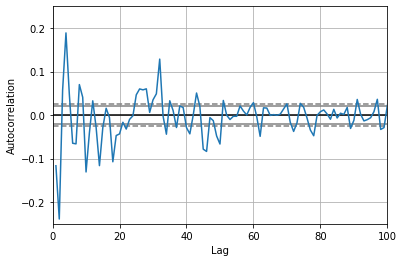

In [517]:
var = 'FA_RAW'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])]);
plt.xlim(0, 100)
plt.ylim(-.25, .25)
plt.savefig('figs/lagplot_ZLS_raw.pdf', bbox_inches='tight', dpi=144)


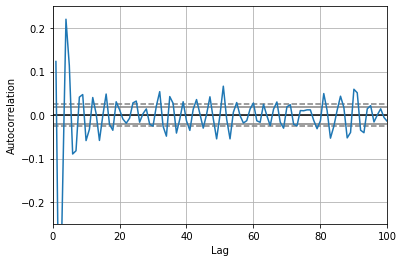

In [516]:
var = 'Free_Air_dgs'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])]);
plt.xlim(0, 100)
plt.ylim(-.25, .25)
plt.savefig('figs/lagplot_DgS_raw.pdf', bbox_inches='tight', dpi=144)


<Figure size 432x288 with 0 Axes>

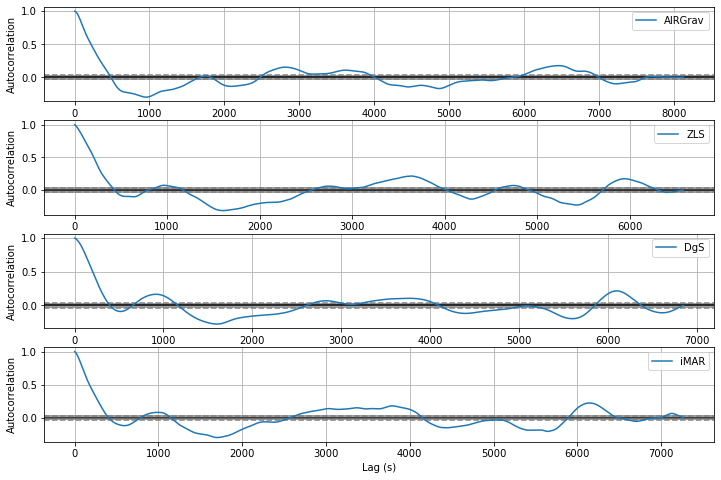

In [515]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(411)
var = 'sgl_all'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])], ax=ax1, label='AIRGrav');
ax2 = fig.add_subplot(412)
var = 'ZLS_AN04'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])], ax=ax2, label='ZLS');
ax3 = fig.add_subplot(413)
var = 'DgS_AN04'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])], ax=ax3, label='DgS');
ax4 = fig.add_subplot(414)
var = 'iMAR_AN04_TC_ed'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])], ax=ax4, label='iMAR');
plt.xlabel('Lag (s)')
plt.savefig('figs/lagplot_ALL.pdf', bbox_inches='tight', dpi=144)


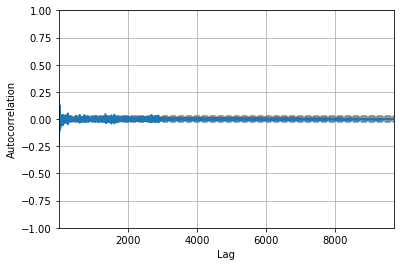

In [324]:
var = 'FA_RAW'
pd.plotting.autocorrelation_plot(df[var][~np.isnan(df[var])]);

## ARIMA

<Figure size 792x432 with 0 Axes>

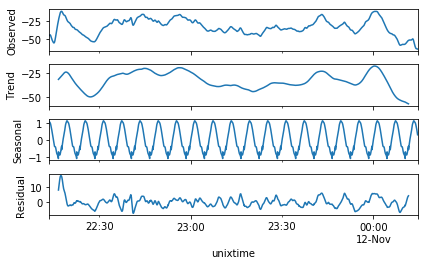

In [514]:
#     from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.seasonal import seasonal_decompose
    var = 'iMAR_AN04_TC_ed'
    decomposition = seasonal_decompose(df[var][~np.isnan(df[var])], model='additive', freq=360)
    fig = plt.figure(figsize=(11, 6))
    fig = decomposition.plot()
#     fig.suptitle('OHC Bottom: F' + str(float), fontsize=16, alpha=1, ha='right')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()
    plt.savefig('figs/iMAR_AN04.pdf', bbox_inches='tight', dpi=144)


<Figure size 792x432 with 0 Axes>

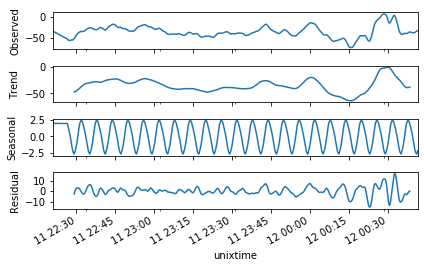

<Figure size 432x288 with 0 Axes>

In [513]:
    var = 'sgl_all'
    decomposition = seasonal_decompose(df[var][~np.isnan(df[var])], model='additive', freq=360)
    fig = plt.figure(figsize=(11, 6))
    fig = decomposition.plot()
#     fig.suptitle('OHC Bottom: F' + str(float), fontsize=16, alpha=1, ha='right')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()
    plt.savefig('figs/arimaplot_AIRGrav.pdf', bbox_inches='tight', dpi=144)


<Figure size 792x432 with 0 Axes>

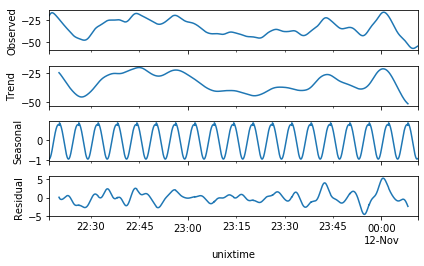

<Figure size 432x288 with 0 Axes>

In [512]:
    var = 'DgS_AN04'
    decomposition = seasonal_decompose(df[var][~np.isnan(df[var])], model='additive', freq=360)
    fig = plt.figure(figsize=(11, 6))
    fig = decomposition.plot()
#     fig.suptitle('OHC Bottom: F' + str(float), fontsize=16, alpha=1, ha='right')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()
    plt.savefig('figs/arimaplot_DgS04.pdf', bbox_inches='tight', dpi=144)


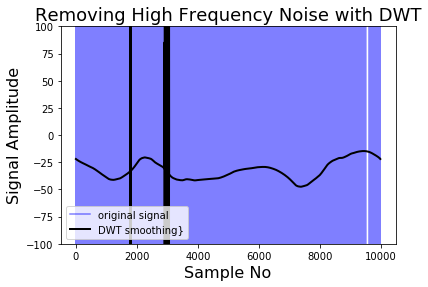

In [276]:
import pywt

signal = df['Free_Air_dgs'].values
 
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.90)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.ylim(-100, 100)
plt.show()

## Periodogram

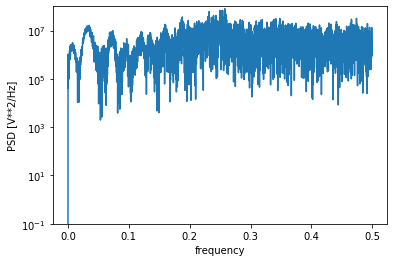

In [297]:
import scipy.signal as scsig

var = 'FA_RAW'

plt.figure()
f, Pxx = scsig.periodogram(df[var][~np.isnan(df[var])])
plt.semilogy(f, Pxx)
plt.xlabel('frequency')
plt.ylabel('PSD [V**2/Hz]')
plt.ylim(0.1, 100000000)
plt.show()

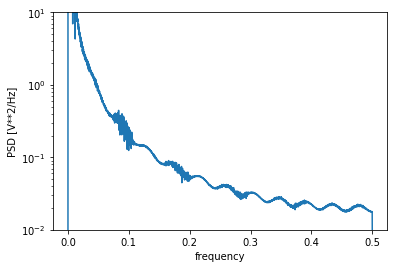

In [303]:
import scipy.signal as scsig

var = 'sgl_all'

plt.figure()
f, Pxx = scsig.periodogram(df[var][~np.isnan(df[var])])
plt.semilogy(f, Pxx)
plt.xlabel('frequency')
plt.ylabel('PSD [V**2/Hz]')
plt.ylim(0.01, 10)
plt.show()

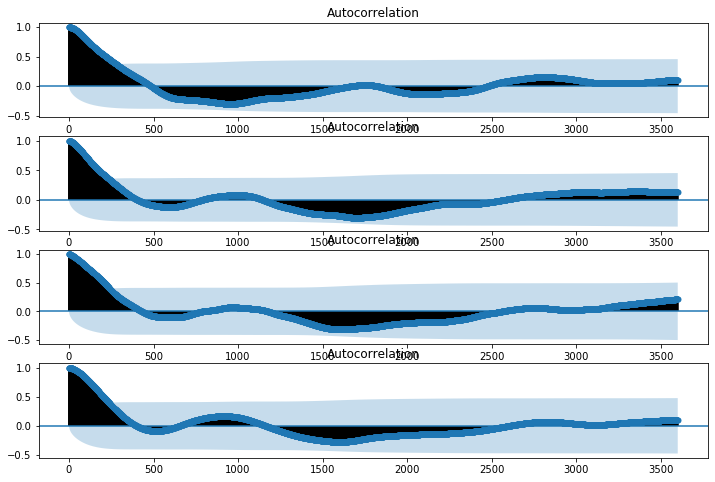

In [320]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(411)
var = 'sgl_all'
fig = sm.graphics.tsa.plot_acf(df[var][~np.isnan(df[var])].squeeze(), lags=3600, ax=ax1)
ax2 = fig.add_subplot(412)
var = 'iMAR_AN04_TC_ed'
fig = sm.graphics.tsa.plot_acf(df[var][~np.isnan(df[var])].squeeze(), lags=3600, ax=ax2)
ax3 = fig.add_subplot(413)
var = 'ZLS_AN04'
fig = sm.graphics.tsa.plot_acf(df[var][~np.isnan(df[var])].squeeze(), lags=3600, ax=ax3)
ax4 = fig.add_subplot(414)
var = 'DgS_AN04'
fig = sm.graphics.tsa.plot_acf(df[var][~np.isnan(df[var])].squeeze(), lags=3600, ax=ax4)



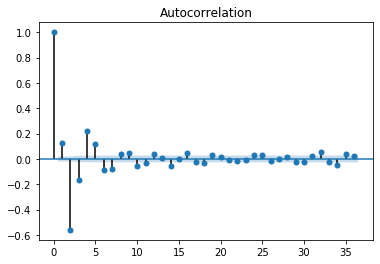

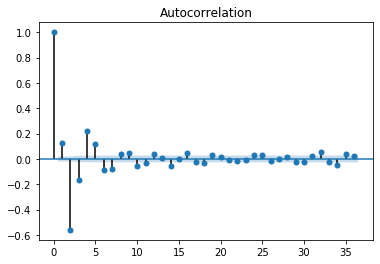

In [307]:
sm.graphics.tsa.plot_acf(df['Free_Air_dgs'].squeeze(), lags=36)

## LOWESS
Need to adjust "frac" in the lowess module to get a compatible, linear relationship.

In [379]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = df['unixtime']
# x = df['Dist']
y = df['FA_RAW']

# lowess will return our "smoothed" data with a y value for at every x-value
my_frac = 0.15
lowess = sm.nonparametric.lowess(y, x, frac=my_frac)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400000)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)
# df['imar_bias_lowess'] = lowess_y

In [380]:
# df_temp['imar_bias_lowess'] = np.squeeze(lowess_y)
data=np.array([lowess_x, lowess_y]).T
lowess_index = pd.to_datetime(lowess_x,unit='s')
df_lowess = pd.DataFrame(data=data, index=lowess_index, columns=['unixtime','imar_bias_lowess'])
df_lowess.head()
# df_lowess['datestring'] = pd.to_datetime(df_lowess['unixtime'],unit='s')
# df_lowess = df_lowess.set_index(pd.to_datetime(df_lowess['unixtime'],unit='s'))
# df_lowess.head()

,unixtime,imar_bias_lowess
2015-11-11 22:13:42,1.447280e+09,-23.181326
2015-11-11 22:13:43,1.447280e+09,-23.217198
2015-11-11 22:13:44,1.447280e+09,-23.253033
2015-11-11 22:13:45,1.447280e+09,-23.288830
2015-11-11 22:13:46,1.447280e+09,-23.324590


Text(0.5, 0.98, 'L650_inte_F=0.15')

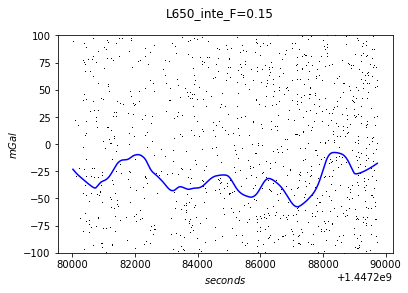

In [381]:
fig, ax = plt.subplots()
plt.plot(x, y, 'k,')
plt.plot(lowess_x, lowess_y, 'b')
plt.plot(xnew, ynew, 'r-')
ax.set_xlabel('$seconds$')
ax.set_ylabel('$mGal$')
plt.ylim(-100, 100)
# ax.text(1,1, infile[:9] + '_' + str(my_frac))
plt.suptitle(infile[:9] + '_F=' + str(my_frac))
# plt.savefig('figs/' + infile[:9] + '_iMARbias-lowess_F=' + str(my_frac) + '.png')

## Savitzky - Golay

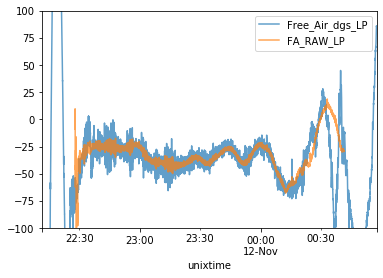

In [511]:
from scipy import signal

df['FA_RAW_LP'] = signal.savgol_filter(df['FA_RAW'].values, 1701, 5, mode='nearest')
df['Free_Air_dgs_LP'] = signal.savgol_filter(df['Free_Air_dgs'].values, 1701, 5, mode='nearest')

df[['Free_Air_dgs_LP', 'FA_RAW_LP']].plot(alpha=0.7); plt.ylim(-100, 100);
plt.show()